In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 
import scipy.stats as stats
import math
import sklearn.preprocessing

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

import acquire 
import wrangle as w

a = .05

# Acquire

* I acquired this data from the Codeup database using mySQL workbench
* Each observation or row represents a business profile of a customer
* Each column represents a feature of the customer's account
* I acquired this data on Wednesday October 26th 
* The data has 7,043 rows and 24 columns 

# Prepare

* Removed null values stored as whitespace
* Changed total charges from object to float and did not identify or address outliers
* Split data into train, validate and test(approx. 74/16/10)
* Encoded binary categorical variables to 1 or 0 
* Converted non-binary categorical variables to 1 and 0 
* No columns were dropped during preparation 

## Data Dictionary
| Feature | Definition |
|:--------|:-----------|
|Beds| Number of bedrooms in the home|
|Baths| Number of bathrooms in the home|
|sqft| The square footage of the home|
|room count| Represents the total number of rooms in the home|
|fips| The county the property is located in Los Angelese County CA, Ventura CA or Orange County CA|

In [2]:
w.new_zillow_data()

,bedroomcnt,bathroomcnt,fips,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,4.0,3.5,6059.0,3100.0,1023282.0
1,2.0,1.0,6111.0,1465.0,464000.0
2,3.0,2.0,6059.0,1243.0,564778.0
3,4.0,3.0,6037.0,2376.0,145143.0
4,4.0,3.0,6037.0,2962.0,773303.0
...,...,...,...,...,...
52437,2.0,2.0,6037.0,1286.0,354621.0
52438,4.0,2.0,6111.0,1612.0,67205.0
52439,3.0,1.0,6037.0,1032.0,49546.0
52440,3.0,2.0,6037.0,1762.0,522000.0


In [3]:
#create, train, validate, test datasets

train, validate, test = w.wrangle_zillow()

In [4]:
# viewing size of train dataset
train.shape

(23377, 7)

In [5]:
# viewing size of validate dataset
validate.shape

(10019, 7)

In [6]:
# viewing size of test dataset
test.shape

(8349, 7)

In [7]:
train['rooms_count']= train['baths']+train['beds']

train

,propertylandusetypeid,parcelid,id,logerror,transactiondate,id.1,airconditioningtypeid,architecturalstyletypeid,basementsqft,baths,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusedesc,fips_Orange County CA,fips_Ventura County CA,rooms_count
17927,261.0,17136492,26716,0.026585,2017-04-14,567409,NaN,NaN,NaN,2.0,...,2016.0,35133.0,1579.36,NaN,NaN,6.111005e+13,Single Family Residential,0,1,6.0
32344,261.0,11165912,47884,0.018149,2017-06-19,107381,1.0,NaN,NaN,3.0,...,2016.0,159362.0,5343.15,NaN,NaN,6.037920e+13,Single Family Residential,0,0,8.0
37064,261.0,11194874,54759,0.011635,2017-07-07,629574,1.0,NaN,NaN,2.0,...,2016.0,37757.0,3821.93,NaN,NaN,6.037910e+13,Single Family Residential,0,0,6.0
39303,261.0,13869630,58049,-0.066062,2017-07-18,1486924,NaN,NaN,NaN,1.0,...,2016.0,279830.0,4409.76,NaN,NaN,6.059011e+13,Single Family Residential,1,0,4.0
43129,261.0,11031366,63764,-0.029371,2017-08-04,2716339,NaN,NaN,NaN,2.0,...,2016.0,254015.0,4837.38,Y,14.0,6.037120e+13,Single Family Residential,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10420,261.0,14379210,15550,0.058656,2017-03-08,1996102,NaN,NaN,NaN,2.0,...,2016.0,143533.0,3132.08,NaN,NaN,6.059032e+13,Single Family Residential,1,0,7.0
11779,261.0,14152759,17501,0.129789,2017-03-16,1368848,NaN,NaN,NaN,2.0,...,2016.0,140792.0,2650.72,NaN,NaN,6.059001e+13,Single Family Residential,1,0,4.0
36187,261.0,12132998,53462,-0.033549,2017-06-30,2973664,NaN,NaN,NaN,1.0,...,2016.0,27730.0,516.15,NaN,NaN,6.037431e+13,Single Family Residential,0,0,3.0
8813,261.0,11276615,13184,0.004899,2017-02-28,987689,1.0,NaN,NaN,3.0,...,2016.0,42400.0,3400.41,NaN,NaN,6.037901e+13,Single Family Residential,0,0,7.0


In [8]:
# reset index 
train=train.reset_index()

In [9]:
train

,index,propertylandusetypeid,parcelid,id,logerror,transactiondate,id.1,airconditioningtypeid,architecturalstyletypeid,basementsqft,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusedesc,fips_Orange County CA,fips_Ventura County CA,rooms_count
0,17927,261.0,17136492,26716,0.026585,2017-04-14,567409,NaN,NaN,NaN,...,2016.0,35133.0,1579.36,NaN,NaN,6.111005e+13,Single Family Residential,0,1,6.0
1,32344,261.0,11165912,47884,0.018149,2017-06-19,107381,1.0,NaN,NaN,...,2016.0,159362.0,5343.15,NaN,NaN,6.037920e+13,Single Family Residential,0,0,8.0
2,37064,261.0,11194874,54759,0.011635,2017-07-07,629574,1.0,NaN,NaN,...,2016.0,37757.0,3821.93,NaN,NaN,6.037910e+13,Single Family Residential,0,0,6.0
3,39303,261.0,13869630,58049,-0.066062,2017-07-18,1486924,NaN,NaN,NaN,...,2016.0,279830.0,4409.76,NaN,NaN,6.059011e+13,Single Family Residential,1,0,4.0
4,43129,261.0,11031366,63764,-0.029371,2017-08-04,2716339,NaN,NaN,NaN,...,2016.0,254015.0,4837.38,Y,14.0,6.037120e+13,Single Family Residential,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25945,10420,261.0,14379210,15550,0.058656,2017-03-08,1996102,NaN,NaN,NaN,...,2016.0,143533.0,3132.08,NaN,NaN,6.059032e+13,Single Family Residential,1,0,7.0
25946,11779,261.0,14152759,17501,0.129789,2017-03-16,1368848,NaN,NaN,NaN,...,2016.0,140792.0,2650.72,NaN,NaN,6.059001e+13,Single Family Residential,1,0,4.0
25947,36187,261.0,12132998,53462,-0.033549,2017-06-30,2973664,NaN,NaN,NaN,...,2016.0,27730.0,516.15,NaN,NaN,6.037431e+13,Single Family Residential,0,0,3.0
25948,8813,261.0,11276615,13184,0.004899,2017-02-28,987689,1.0,NaN,NaN,...,2016.0,42400.0,3400.41,NaN,NaN,6.037901e+13,Single Family Residential,0,0,7.0


In [10]:
#Rounding up in rooms count 
train['rooms_count'] = train['rooms_count'].apply(np.ceil)

### What is the median and mean home price? 

<AxesSubplot:>

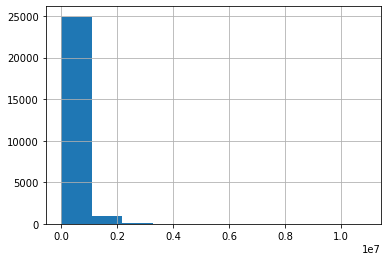

In [11]:
train.property_value.hist()

In [12]:
#calculating median of property values 
median = train.property_value.median()
median

335496.0

In [13]:
#calculating mean of property values 
mean = train.property_value.mean()
mean

406688.7585741811

In [14]:
# difference between mean and median 
difference = mean - median

difference

71192.75857418112

In [15]:
# most expensive property value 
train.property_value.max()

10873908.0

### Takeaways

- The median property value is 370,301
- The mean property value is 516,153
- The difference between these values is 145,852
- 50% of home values are above or below the median 
- Mean is higher than median most likely due to outlier home prices

### Is there a significant difference in mean property value across Los Angeles, Ventura County and Orange County?  

[Text(0.5, 1.0, 'Spread of Home Prices')]

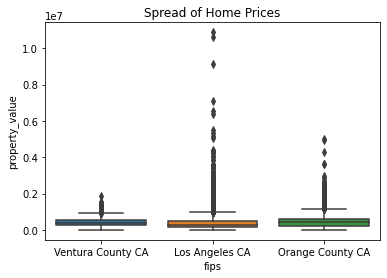

In [16]:
# box plot Fips vs Property value 
sns.boxplot(data=train, x='fips', y='property_value').set(title='Spread of Home Prices')


### Chart Takeaways 
- Difficult to verify prices but you can see there is a wider spread of home prices in Los angelese california compared to other counties.
- Orange County has the second largest spread 
- Ventura County has the smallest spread of home prices 


### Hypothesis

**Ho: There is no difference in mean property values across Los Angeles County, Ventura County and Orange County.**<br>
**Ha: There is a significant difference in mean property values across Los Angeles County, Ventura County and Orange County.** 

In [17]:
# Count of properties in each County
train.fips.value_counts()

Los Angeles CA       17145
Orange County CA      6684
Ventura County CA     2121
Name: fips, dtype: int64

In [18]:
la = train[train.fips == 'Los Angeles CA'].property_value
oc = train[train.fips == 'Orange County CA'].property_value
vc = train[train.fips == 'Ventura County CA'].property_value

<AxesSubplot:>

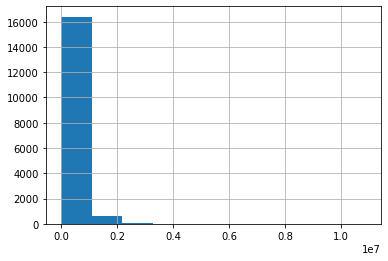

In [19]:
# histogram of prices in La County
la.hist()

<AxesSubplot:>

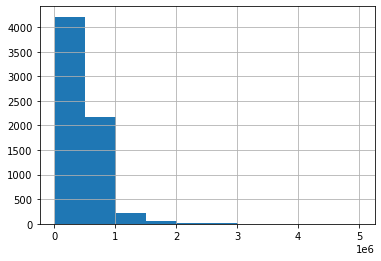

In [20]:
# histogram of prices in Orange County
oc.hist()

<AxesSubplot:>

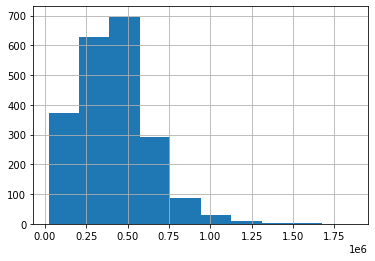

In [21]:
# histogram of prices in Ventura County
vc.hist()

In [22]:
# variance of prices in La County
la.var()

160212611872.99872

In [23]:
# variance of prices in Orange County
oc.var()

111769136803.31723

In [24]:
# variance of prices in Ventura County
vc.var()

50149724275.63968

In [25]:
# results of statistical test 
stats.kruskal(la, oc, vc)

KruskalResult(statistic=845.3768766827094, pvalue=2.683759928119005e-184)

### Takeaways 
- These prices are not normally distributed 
- Will use Kruskal-Wallis test since prices not normally distributed 
- Variances are not similar 
- There is a significant difference in the mean property value of the homes across Los Angeles, Ventura and Orange County 


### Is there a correlation between the sqft of a house and it's property value ?  

[Text(0.5, 1.0, 'Sqft and Value')]

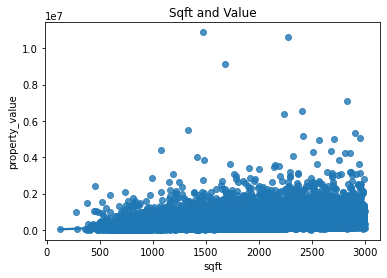

In [26]:
#visualization of sqft vs property value 

sns.regplot(x="sqft",
            y="property_value", 
            data=train).set(title='Sqft and Value')


### Chart Takeaways 
- Most homes are between 0 and 8,000 sqft 
- Most properties are under $1 million

### Hypothesis: 

**Ho: There is no correlation between home square footage and property value.**<br>
**Ha: There is a correlation between home square footage and property value.** 

In [27]:
# statistics test results 
corr, p = stats.pearsonr(train.sqft, train.property_value)

corr, p

(0.3613222696879478, 0.0)

### Takeaway from test 
- Test is significant and there is a positive correlation between home sqft and home price

### Is there a correlation between the bedrooms  and property value ?  

[Text(0.5, 1.0, 'Beds and Home Price')]

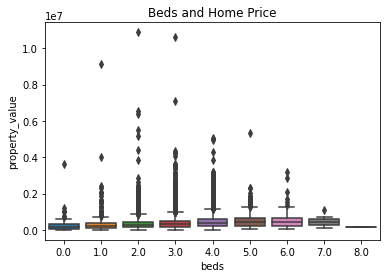

In [28]:
# box plot Bedrooms vs Property value 
sns.boxplot(data=train, x='beds', y='property_value').set(title='Beds and Home Price')


### Takeaways 

- There are a lot of outliers in each category of bedrooms 
- Most properties fall into the category of having 2 to 6 bedrooms

### Hypothesis: 

**Ho: There is no correlation between number of beds and property value.**<br>
**Ha: There is a correlation between number of beds and property value.** 


In [29]:
# Statistical test results 
corr, p = stats.pearsonr(train.beds, train.property_value)

corr, p

(0.10976927105254083, 2.2310937823681123e-70)

### Takeaways 
- Bedrooms has a weak positive correlation to the property value 

### Is there a correlation between the bathrooms  and property value ?  

[Text(0.5, 1.0, 'Baths and Home Price')]

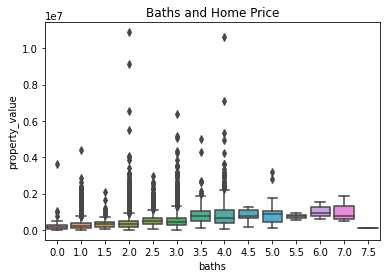

In [30]:
# box plot Bathrooms vs Property value 
sns.boxplot(data=train, x='baths', y='property_value').set(title='Baths and Home Price')

In [31]:
corr, p = stats.pearsonr(train.baths, train.property_value)

corr, p

(0.30256024562018746, 0.0)

### Hypothesis: 

**Ho: There is no correlation between number of baths and property value.**<br>
**Ha: There is a correlation between number of baths and property value.** 


### Takeaways

There is a positive correlation between bathrooms and property value

### Is there a correlation between the room count and property value ?  

[Text(0.5, 1.0, 'Rooms and Home Price')]

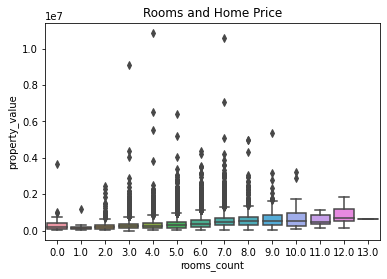

In [32]:
# box plot Bathrooms vs Property value 
sns.boxplot(data=train, x='rooms_count', y='property_value').set(title='Rooms and Home Price')

### Takeaways

- The mean price of properties is increasing as the number of rooms increase 

### Hypothesis

**Ho: TThere is no correlation between number of rooms and property value.**<br>
**Ha: There is a correlation between number of rooms and property value.** 

In [33]:
corr, p = stats.pearsonr(train.rooms_count, train.property_value)

corr, p

(0.23059609601130557, 2.86852242924723e-310)

### Takeaways
- there is positive correlation between total rooms in a home and property value

## Exploration Summary

* Median price is 371,456 
* Mean property value is 518,710
* 50% of home values are above and below 371,456 and do not exceed 2
* The difference between Mean and Median is 147,254
* The features used for modeling will be baths, beds, sqft and fips
* The statistical tests provide support that there is a correlation between Property value and baths, beds, sqft
* Statistical testing supports a significant relationship between fips code and property value 


## Features included in Models

* The features for my models are baths, beds, sqft and fips
* These features showed an association with property value after completing my statistical tests

## Features NOT included in Model

* Rooms count will not be included in my Model
* There was a correlation to property value and rooms but it was not strong compared to the other features being used in the model 

## Setting up train, validate and test variables 

In [34]:
# columns used as independent variables 
x_cols = ['beds','baths','sqft']

In [35]:
# assigning features to x/y train, validate and test 
X_train = train[x_cols]
y_train = train['property_value']

X_validate = validate[x_cols]
y_validate = validate['property_value']

X_test = test[x_cols]
y_test = test['property_value']

# Prepare data for models


## Scale data for X train

In [36]:
# applying scaling to all the data splits.
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(X_train)


# transforming train, validate and test datasets
X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)



## Baseline Model

In [37]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict property_value_pred_mean
prop_value_pred_mean = y_train['property_value'].mean()
y_train['prop_value_pred_mean'] = prop_value_pred_mean
y_validate['prop_value_pred_mean'] = prop_value_pred_mean

# 2. compute prop_value_pred_median
prop_value_pred_median = y_train['property_value'].median()
y_train['prop_value_pred_median'] = prop_value_pred_median
y_validate['prop_value_pred_median'] = prop_value_pred_median

# 3. RMSE of prop_value_pred_mean
rmse_train = mean_squared_error(y_train.property_value, y_train.prop_value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.property_value, y_validate.prop_value_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of prop_value_pred_median
rmse_train = mean_squared_error(y_train.property_value, y_train.prop_value_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.property_value, y_validate.prop_value_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  374068.55 
Validate/Out-of-Sample:  387413.56
RMSE using Median
Train/In-Sample:  380783.0 
Validate/Out-of-Sample:  395096.96


## Visualizing target variable 

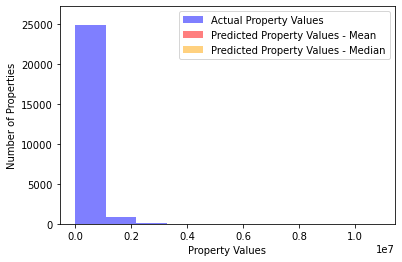

In [38]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.property_value, color='blue', alpha=.5, label="Actual Property Values")
plt.hist(y_train.prop_value_pred_mean, bins=1, color='red', alpha=.5, rwidth=20, label="Predicted Property Values - Mean")
plt.hist(y_train.prop_value_pred_median, bins=1, color='orange', alpha=.5, rwidth=20, label="Predicted Property Values - Median")
plt.xlabel("Property Values")
plt.ylabel("Number of Properties")
plt.legend()
plt.show()

## LinearRegression OLS 

In [40]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.property_value)

# predict train
y_train['property_value_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.property_value, y_train.property_value_pred_lm)**(1/2)

# predict validate
y_validate['property_value_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.property_value, y_validate.property_value_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  344065.8617743427 
Validation/Out-of-Sample:  356369.38726423896


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


### Takeaways 
- model performs better than baseline 

## LassoLars - area, beds, baths

In [41]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.property_value)

# predict train
y_train['property_value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.property_value, y_train.property_value_pred_lars)**(1/2)

# predict validate
y_validate['property_value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.property_value, y_validate.property_value_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train,)


RMSE for Lasso + Lars
Training/In-Sample:  344066.0761344583 
Validation/Out-of-Sample:  356372.14646836766
RMSE for Lasso + Lars
Training/In-Sample:  344066.0761344583


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


### Takeaways 
- model performs better than baseline 

## TweedieRegressor(GLM) - area, beds, baths

In [42]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.property_value)

# predict train
y_train['property_value_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.property_value, y_train.property_value_pred_glm)**(1/2)

# predict validate
y_validate['property_value_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.property_value, y_validate.property_value_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  374068.55130649824 
Validation/Out-of-Sample:  387413.56477450964


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

In [ ]:
performs better than baseline 

## Polynomial regression - area, beds, baths

In [43]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
#X_test_degree2 = pf.transform(X_test)

## Linear Regression - area, beds, baths

In [44]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.property_value)

# predict train
y_train['property_value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.property_value, y_train.property_value_pred_lm2)**(1/2)

# predict validate
y_validate['property_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.property_value, y_validate.property_value_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  341879.79414840636 
Validation/Out-of-Sample:  355253.86344202806


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [ ]:
performs better than baseline 

### Introduction

* I will use accuracy as my evaluation metric because I do not have a monetary value to associate with the churn of a customer
* ~ 73% of customers don't churn 
* My baseline model assumes every customer does not churn and this results in an accuracy of 73%
* Models will be evaluated on train and validate data sets 
* The model that performs the best will be evaluated on the test data

## Best Models

## Test Model
* I will run my logistic regression model on my test data

### Modeling Wrap 

* I would recommend this model for production because it does not over fit the data and it performs 4% better than the baseline

## Conclusion

### Summary
* 26% of customers churn 
* Statistical evidence supports an association between churn and tech support, internet service, fiber optic internet and contract type respectively 
* The drivers I used were supported by statistical tests and I believe this is why my final model was able to perform above the baseline
* There is not an association between phone service and churn 


### Modeling Summary 
* The final model performed 4% better than the baseline
* I would recommend this model for production because it does not over fit the data and and performed better than baseline


### Recommendations
* Gather qualitative and quantitative data from customer's about the performance of the fiber optic internet 
* Solicit for quantitative and qualitative data on why customer's select month to month contracts 
* Review incentives offered for each contract type. 

### Next Steps
* I would like to use the financial data to determine the mean value of churn per customer
* Look for more drivers to develop a better performing model 